<a href="https://colab.research.google.com/github/gulabpatel/AutoML/blob/main/AutoViML_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

autoviml Auto Variant Interpretation Machine learning

Autoviml does feature engeering to some extent.

In [1]:
!pip install autoviml

In [2]:
!pip install shap

In [3]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd

In [4]:
#BASE_DIR = '/tmp'
#OUTPUT_FILE = os.path.join(BASE_DIR, 'churn_data.csv')
#churn_data=urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv', OUTPUT_FILE)

In [7]:
churn_df = pd.read_csv('/content/Churn.csv')

In [8]:
churn_df.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [9]:
size = int(0.7*churn_df.shape[0])
train_df = churn_df[:size]
test_df = churn_df[size:]

In [10]:
from autoviml.Auto_ViML import Auto_ViML

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do


Imported Auto_NLP version: 0.0.44.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)
Imported Auto_ViML version: 0.1.665. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
To remove previous versions, perform 'pip uninstall autoviml'
NEW! Now Auto_ViML comes with a feature_engineering module using featuretools library!
To get the latest versio

In [11]:
target='Churn_Label'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (4930, 20)
    Training Set Memory Usage = 0.75 MB
Test Set Shape = (2113, 20)
    Test Set Memory Usage = 0.32 MB
Single_Label Target: ['Churn_Label']
Shuffling the data set before training
       Class  -> Counts -> Percent
          No:    3061  ->   62.1%
         Yes:    1869  ->   37.9%
Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
String or Multi Class target: Churn_Label transformed as follows: {'No': 0, 'Yes': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  10
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  6
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of N

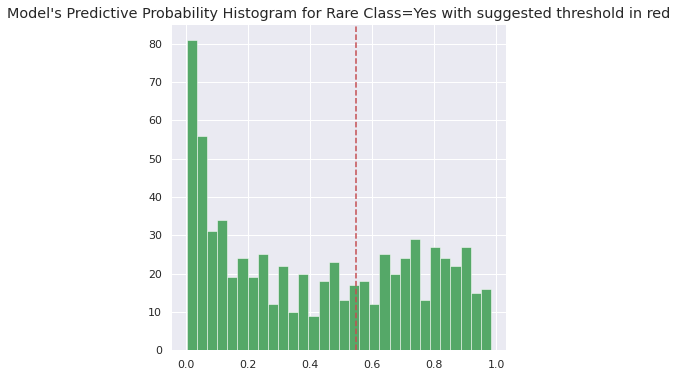

    Using threshold=0.5. However, 0.546 provides better F1=0.73 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 78.3%
Balanced Accuracy = 76.14% with Threshold = 0.50
Confusion Matrix:
[[333  92]
 [ 73 207]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       425
           1       0.69      0.74      0.72       280

    accuracy                           0.77       705
   macro avg       0.76      0.76      0.76       705
weighted avg       0.77      0.77      0.77       705

Balanced Accuracy = 77.37% with Threshold = 0.55
Confusion Matrix:
[[351  74]
 [ 78 202]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       425
           1       0.73      0.72      0.73       280

    accuracy                           0.78       705
   macro avg       0.78      0.77      0.77

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 77.187%
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       425
           1       0.73      0.72      0.72       280

    accuracy                           0.78       705
   macro avg       0.77      0.77      0.77       705
weighted avg       0.78      0.78      0.78       705

[[351  74]
 [ 79 201]]
#############################################################################
Single Model is better than Ensembling Models for this data set.
Could not plot Model Evaluation Results Metrics
    Time taken for this Target (in seconds) = 137
Training model on complete Train data and Predicting using give Test Data...
    Binning_Flag set to False or there are no numeric vars in data set to be binned
Feature scaling for total 13 float and integer variables completed using MinMaxScaler()...
##################  Imbalanced Flag Set  ############################
Im

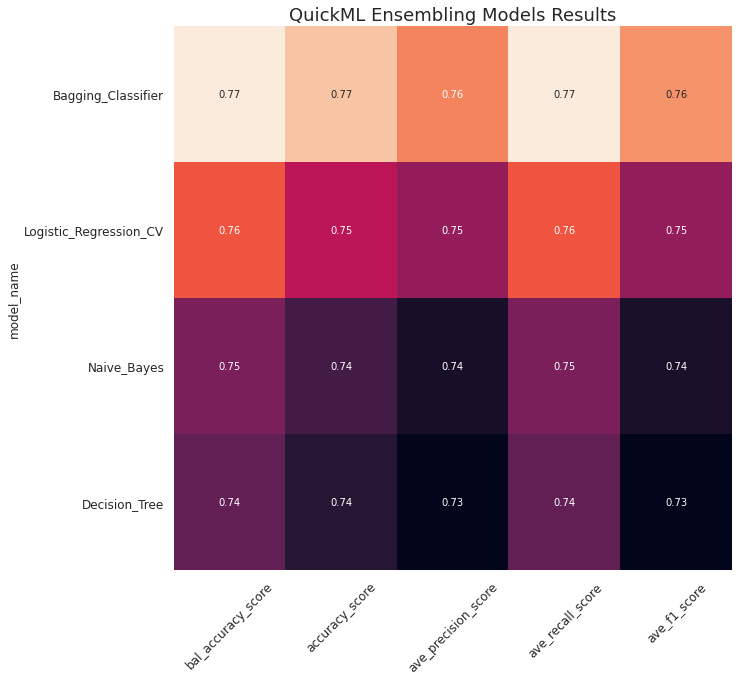

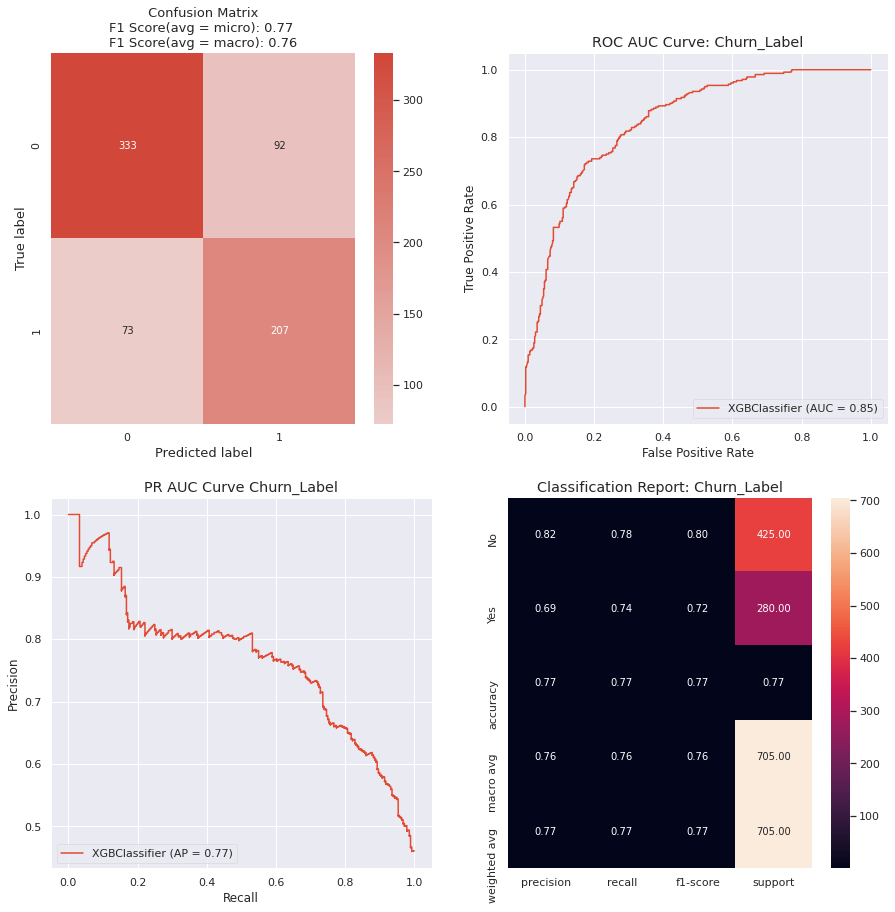

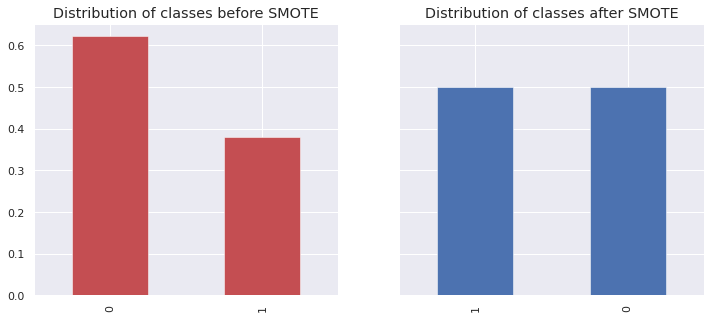

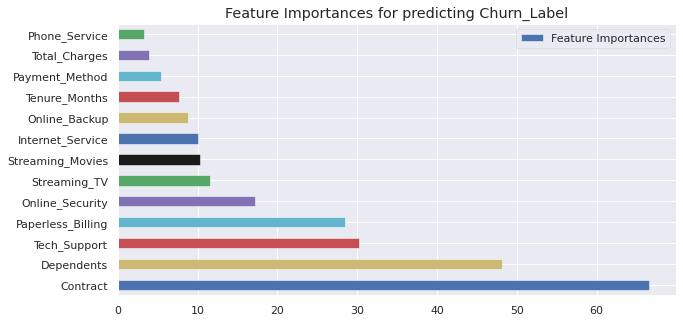

In [12]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=True,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

hyper_param: Tuning options are GridSearch ('GS') and RandomizedSearch ('RS'). Default is 'GS'.

feature_reduction: Default = 'True' but it can be set to False if you don't want automatic    

Boosting Flag: you have 4 possible choices (default is False):                               
  None = This will build a Linear Model                                                  
  False = This will build a Random Forest or Extra Trees model (also known as Bagging)        
  True = This will build an XGBoost model                                                     
  CatBoost = THis will build a CatBoost model (provided you have CatBoost installed)          



In [13]:
features

['Contract',
 'Online_Security',
 'Tech_Support',
 'Dependents',
 'Internet_Service',
 'Tenure_Months',
 'Streaming_Movies',
 'Phone_Service',
 'Streaming_TV',
 'Paperless_Billing',
 'Online_Backup',
 'Payment_Method',
 'Total_Charges']

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
testm

,Contract,Online_Security,Tech_Support,Dependents,Internet_Service,Tenure_Months,Streaming_Movies,Phone_Service,Streaming_TV,Paperless_Billing,Online_Backup,Payment_Method,Total_Charges,Churn_Label_predictions,Churn_Label_proba_No,Churn_Label_proba_Yes,Churn_Label_Logistic_Regression_CV_predictions,Churn_Label_Decision_Tree_predictions,Churn_Label_Naive_Bayes_predictions,Churn_Label_Bagging_Classifier_predictions,Churn_Label_XGBoost_predictions,Churn_Label_Ensembled_predictions
4930,0.50,0.50,0.50,0.00,1.00,0.38,0.50,1.00,0.50,0.00,0.50,1.00,0.75,No,0.95,0.05,No,No,No,No,No,No
4931,1.00,1.00,1.00,0.00,0.50,1.00,1.00,1.00,1.00,1.00,1.00,0.33,0.95,No,0.95,0.05,No,No,No,No,No,No
4932,0.00,0.50,0.50,0.00,1.00,0.01,0.50,1.00,0.50,1.00,0.50,1.00,0.23,Yes,0.34,0.66,Yes,No,Yes,Yes,Yes,Yes
4933,0.00,0.00,0.00,0.00,0.00,0.15,0.00,1.00,0.00,0.00,0.00,0.33,0.64,No,0.68,0.32,Yes,No,Yes,Yes,No,No
4934,1.00,0.50,0.50,1.00,1.00,0.54,0.50,1.00,0.50,0.00,0.50,1.00,1.00,No,0.99,0.01,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.00,0.50,0.50,0.00,1.00,1.00,0.50,1.00,0.50,1.00,0.50,0.00,0.12,No,0.99,0.01,No,No,No,No,No,No
7039,0.50,1.00,1.00,1.00,0.00,0.33,1.00,1.00,1.00,1.00,0.00,1.00,0.24,No,0.95,0.05,No,No,No,No,No,No
7040,0.50,0.00,0.00,1.00,0.50,1.00,1.00,1.00,1.00,1.00,1.00,0.33,0.87,No,0.97,0.03,No,No,No,No,No,No
7041,0.00,1.00,0.00,1.00,0.00,0.15,0.00,0.00,0.00,1.00,0.00,0.67,0.46,No,0.76,0.24,No,No,No,No,No,No


In [17]:
 print(confusion_matrix(test_df[target].values,testm['Churn_Label_predictions'].values))

[[1712  401]
 [   0    0]]


In [24]:
 print(confusion_matrix(test_df[target].values,testm['Churn_Label_Logistic_Regression_CV_predictions'].values))

[[1515  598]
 [   0    0]]


In [20]:
 print(confusion_matrix(test_df[target].values,testm['Churn_Label_Ensembled_predictions'].values))

[[1717  396]
 [   0    0]]


In [21]:
print(classification_report(test_df[target].values,testm['Churn_Label_XGBoost_predictions'].values))

              precision    recall  f1-score   support

          No       1.00      0.81      0.90      2113
         Yes       0.00      0.00      0.00         0

    accuracy                           0.81      2113
   macro avg       0.50      0.41      0.45      2113
weighted avg       1.00      0.81      0.90      2113



In [22]:
print(classification_report(test_df[target].values,testm['Churn_Label_Ensembled_predictions'].values))

              precision    recall  f1-score   support

          No       1.00      0.81      0.90      2113
         Yes       0.00      0.00      0.00         0

    accuracy                           0.81      2113
   macro avg       0.50      0.41      0.45      2113
weighted avg       1.00      0.81      0.90      2113



#References:
Link to supporting video for below notebook walkhthrough - https://www.youtube.com/watch?v=RqhTzEVkfBQ
